In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings("ignore")

In [2]:
# DATA PATH
RAW_DATA_PATH = os.path.join("..","datasets","raw","airline_passengers.csv")
RAW_DATA_PATH

'../datasets/raw/airline_passengers.csv'

In [24]:
air = pd.read_csv(RAW_DATA_PATH)
air.set_index('Month', inplace=True)
air.head(3)

,AirPassengers
Month,
1949-01,112
1949-02,118
1949-03,132


## Augmented Dickey-Fuller Test

In [25]:
def adFullerResult(df):
    result = adfuller(df)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

adFullerResult(air.AirPassengers)

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


## Differencing

### First Differencing 

In [26]:
# First Differencing
air_diff1 = air.AirPassengers.diff().dropna()

adFullerResult(air_diff1)

ADF Statistic: -2.829267
p-value: 0.054213
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


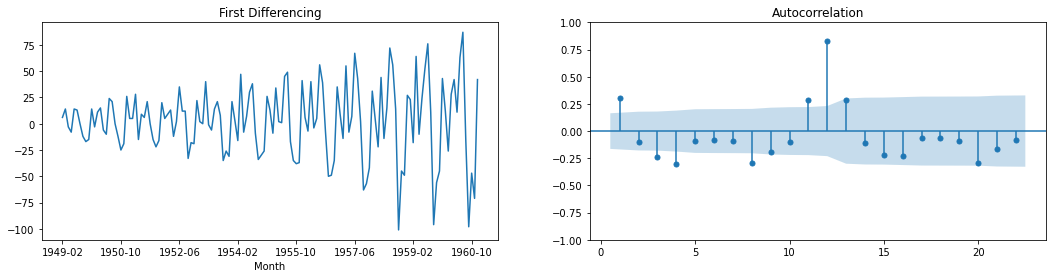

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))

air_diff1.plot(ax=ax[0])
ax[0].set_title("First Differencing")
plot_acf(air_diff1, zero=False, ax=ax[1])
plt.show()

### Second Differencing

In [28]:
air_diff2 = air.AirPassengers.diff().diff().dropna()

adFullerResult(air_diff2)

ADF Statistic: -16.384232
p-value: 0.000000
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


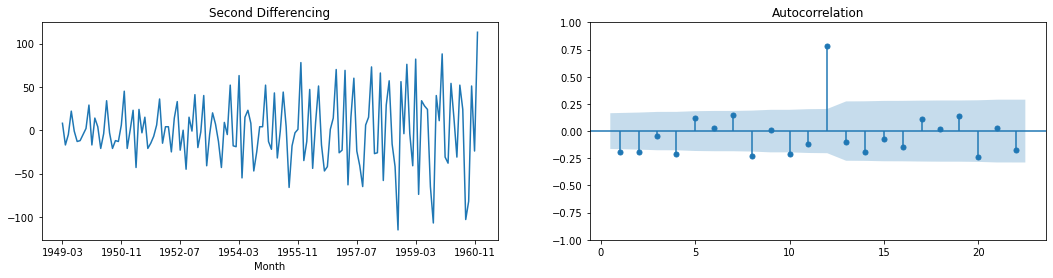

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))

air_diff2.plot(ax=ax[0])
ax[0].set_title("Second Differencing")
plot_acf(air_diff2, zero=False, ax=ax[1])
plt.show()

## Autocorrelation and Partial Autocorrelation

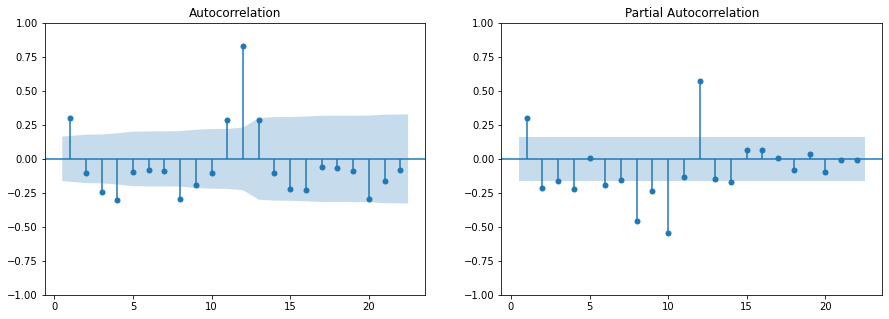

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
plot_acf(air_diff1, zero=False, ax=ax[0])
plot_pacf(air_diff1, method='ywm', zero=False, ax=ax[1])
plt.show()

## Searching for best order

In [31]:
akaike = list()
for p in range(1,4):
    for q in range(1,4):
        try:
            model = ARIMA(air_diff1, order=(p,1,q))
            model_fit = model.fit(disp=0)
            akaike.append([p,q, model_fit.aic])
        except:
            akaike.append([p,q, None])

aic = pd.DataFrame(akaike, columns=["p","q","aic"])
aic.sort_values(by="aic", ignore_index=True, )[:3]

,p,q,aic
0,1,1,None
1,1,2,None
2,1,3,None


In [32]:
model = ARIMA(air_diff1, order=(1,1,1))

In [33]:
air_diff1

Month
1949-02     6.0
1949-03    14.0
1949-04    -3.0
1949-05    -8.0
1949-06    14.0
           ... 
1960-08   -16.0
1960-09   -98.0
1960-10   -47.0
1960-11   -71.0
1960-12    42.0
Name: AirPassengers, Length: 143, dtype: float64

In [34]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [35]:
difference(air.)

NameError: name 'Series' is not defined